# Framingham Heart Disease Risk Study
 ## Data Wrangling

## Imports

In [2]:
# Import packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import math
from scipy.stats.mstats import winsorize

In [3]:
# Importing the functions python files
import importlib
from functions.sb_utils import save_file
from functions.grid_plots import plot_grid_bar, plot_grid_displots, plot_grid_violin, plot_box_grid


## Load the Framingham Heart Study Data
The project will be using the Framingham Heart Study Dataset

In [4]:
# Load csv data file
df = pd.read_csv('../data/raw/Framingham Heart Disease.csv')

## Dataset overview

In [5]:
# Dataset head overview
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


## Table shape

In [6]:
# Getting the shape of the table
print(f'Shape:\t\t{df.shape}\n'
      f'Rows:\t\t{df.shape[0]}\n'
      f'Columns: \t{df.shape[1]}')

Shape:		(4238, 16)
Rows:		4238
Columns: 	16


# Dataset features and info

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


## Duplicate values

In [8]:
print(f' Number of duplicate values:\t{df.duplicated().sum()}')

 Number of duplicate values:	0


## Missing values

In [9]:
print(f'There are 7 columns with missing values.\n'
      f'Total number of missing values:\t{df.isna().sum().sum()}')
df.isna().sum().sort_values(ascending=False).head(10)

There are 7 columns with missing values.
Total number of missing values:	645


glucose          388
education        105
BPMeds            53
totChol           50
cigsPerDay        29
BMI               19
heartRate          1
male               0
age                0
currentSmoker      0
dtype: int64

<AxesSubplot: >

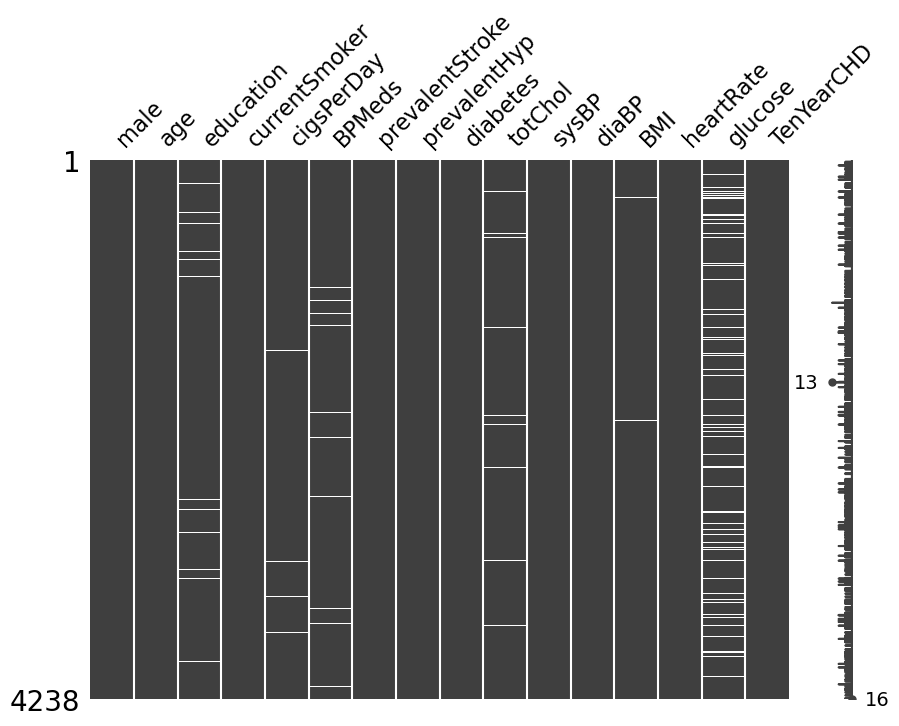

In [10]:
# Visualize missing values
msno.matrix(df, figsize=(10,7))

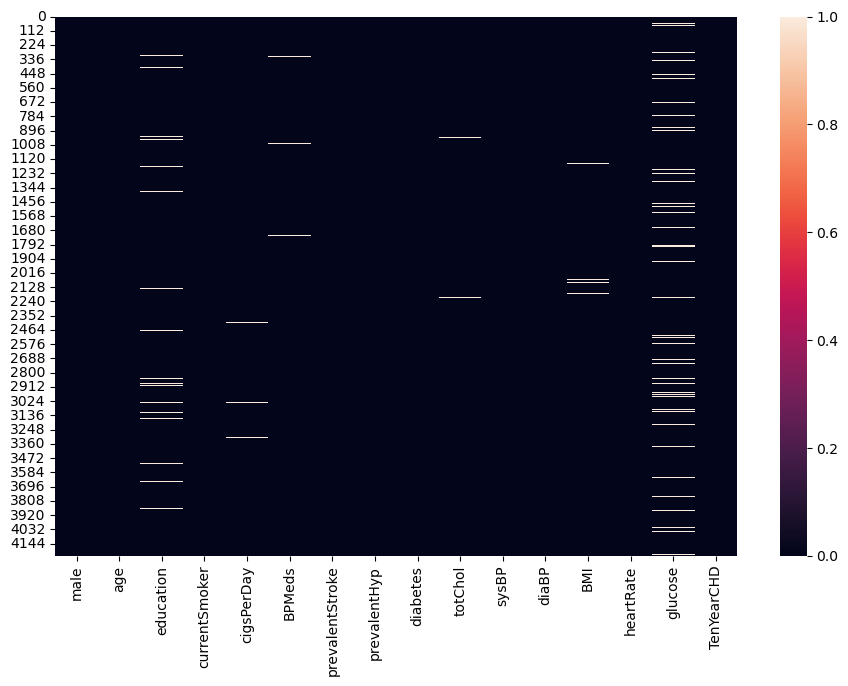

In [11]:
# Another way of visualizing missing values
plt.figure(figsize=(11,7))
sns.heatmap(df.isna());

## Dataset summary of observations
- `sex` and `is_smoking` columns are not numerical data type, might need to convert them later. 


In [12]:
print(f'Number of rows: \t\t{df.shape[0]}\n'
      f'Number of columns: \t\t{df.shape[1]}\n'
      f'Value to be predicted by model: TenYearCHD\n'
      f'Number of duplicates: \t\t{df.duplicated().sum()}\n'
      f'Number of missing: \t\t{df.isna().sum().sum()}\n'
      f'Top missing feature: \t\t{df.isna().sum().sort_values(ascending=False).index[0]} ({df.isna().sum().max()})\n')

Number of rows: 		4238
Number of columns: 		16
Value to be predicted by model: TenYearCHD
Number of duplicates: 		0
Number of missing: 		645
Top missing feature: 		glucose (388)



## Overview of the features

In [13]:
# Viewing all column names
df.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

Let's describe what each feature means.
* male:
    * 0 for female
    * 1 for male
* age: (continuous)
    * Age of the patient 
* education: (ordinal) (presumably)
    1. Some high school
    2. High school diploma
    3. Some college or vocational training
    4. College degree or higher
* current_smoker: (nominal)
    * 1 - Yes
    * 0 - No 
* cigsPerDay: (continuous)
    * Number of cigarettes smoked each day
* BPMeds: (nominal)
    * 1 if patient takes anti-hypertension medications
    * 0 if patient does not take anti-hypertension medications
* prevalentStroke: (nominal)
    * 1 if patient previously had stroke
    * 0 if patient did not have stroke in the past
* prevalentHyp: (nominal)
    * 1 if patient previously had diagnosed hypertension
    * 0 if patient did not have hypertension in the past
* diabetes: (nominal)
    * 1 if patient has diabetes
    * 0 if patient does not have diabetes
* totChol: (continuous)
    * Total cholesterol concentration (mg/dl)
* sysBP: (continuous)
    * Systolic blood pressure (mmHg)
* diaBP: (continuous)
    * Diastolic blood pressure (mmHg)
* BMI: (continuous)
    * Body Mass Index
* heartRate: (continuous)
    * Heart Rate (bpm)
* glucose: (continuous)
    * Blood glucose concentration (mg/dl)
* TenYearCHD: (nominal) ----> Target
    * 1 if patient has 10 year risk of coronary heart disease (CHD)
    * 0 if patient has no 10 year CHD risk

In [14]:
# Describe df
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


## Categorical ans Continuous Values Overview

### Categorical features

In [15]:
# List for categorical values
categorical_cols = [
                      'male'
                    # , 'age'
                    , 'education'
                    , 'currentSmoker'
                    # , 'cigsPerDay'
                    , 'BPMeds'
                    , 'prevalentStroke'
                    , 'prevalentHyp'
                    , 'diabetes'
                    # , 'totChol'
                    # , 'sysBP'
                    # , 'diaBP'
                    # , 'BMI'
                    # , 'heartRate'
                    # , 'glucose'
                    # , 'TenYearCHD'
                    ]

In [16]:
# Print unique categorical values
for col in categorical_cols:
    print(f'Unique values in {col} column: {df[col].unique()}')

Unique values in male column: [1 0]
Unique values in education column: [ 4.  2.  1.  3. nan]
Unique values in currentSmoker column: [0 1]
Unique values in BPMeds column: [ 0.  1. nan]
Unique values in prevalentStroke column: [0 1]
Unique values in prevalentHyp column: [0 1]
Unique values in diabetes column: [0 1]


Summary:
- All features except `education` are bivariate:
    - all olumns have 1 if the feature is present in patient, and 0 if it's absent
- Education column has levels of education from 1 to 4 (presumably):
    1. Some high school
    2. High school diploma
    3. Some college or vocational training
    4. College degree or higher

In [17]:
# Check dtypes of categorical values
df[categorical_cols].dtypes

male                 int64
education          float64
currentSmoker        int64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
dtype: object

All float-dtype columns have missing values. We will convert them to integers after we are done with missingness.

#### Distribution of categorical features

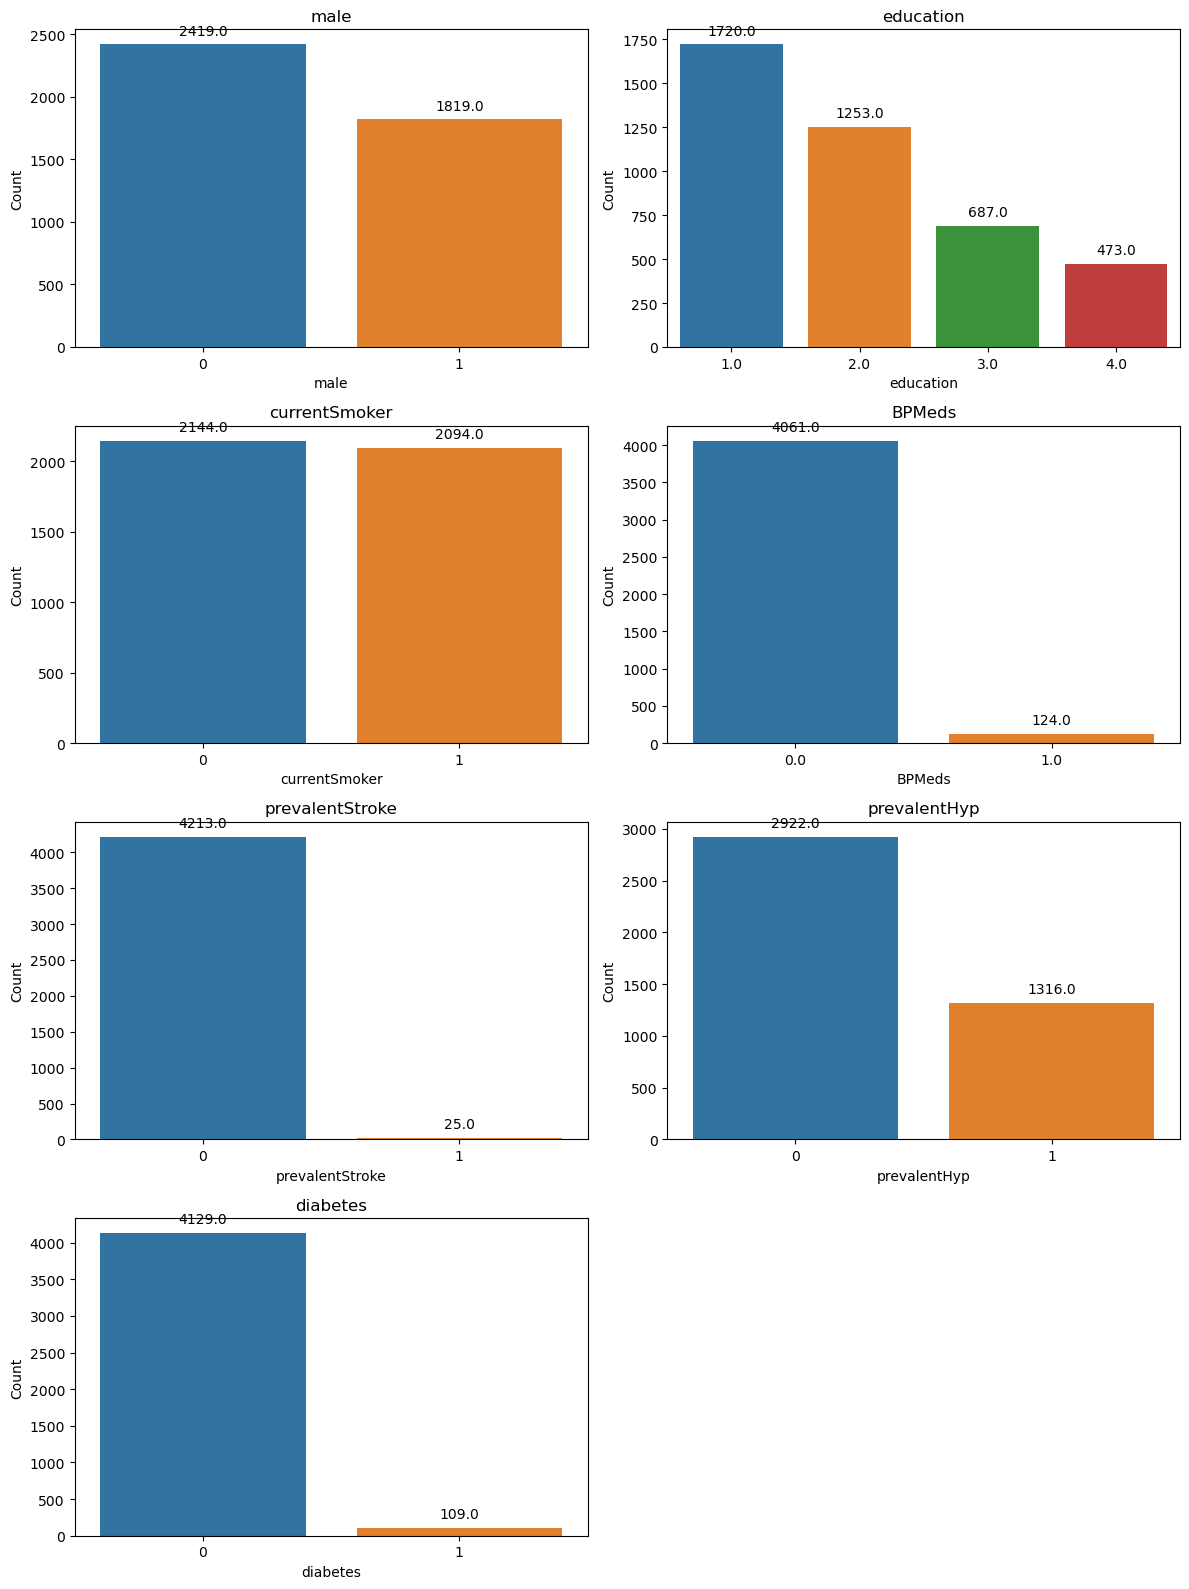

In [18]:
# Plot the distribution of categorical features using imported function
plot_grid_bar(df, categorical_cols)

#### Categorical features summary
- There are more women than men (Does it depend on the age? See below).
- Education level seems to be reasonably representing the general population, where number of more educated people is lower than less educated.
- Smokers and non-smokers are very balanced.
- Only 124 patients take medications for high blood pressure, but there are 1316 patients with the diagnosis of hypertension.
- There is a negligible amount of patients with prevalent stroke (only 25 people).
- There is also few people with established diagnosis of diabetes (109 people).

##### Does ratio of men/women change with age?

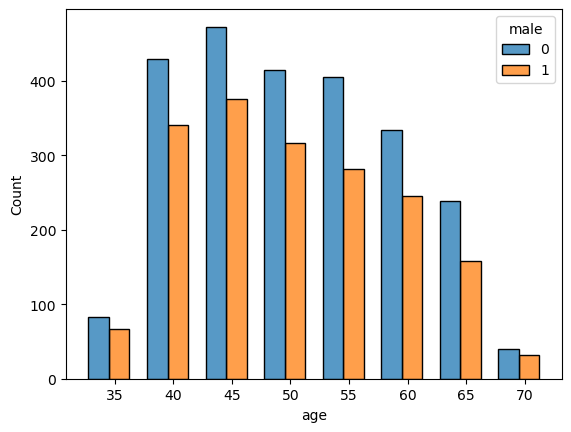

In [19]:
# TODO move this to the EDA
sns.histplot(data=df, x='age', hue='male', binwidth=5, common_bins=True, multiple='dodge', shrink=0.7, legend=True);


It seems like women are prevalent in all age groups.

### Continuous features

In [20]:
# List of continuous features
continuous_cols = [
                    #   'male'
                        'age'
                    # , 'education'
                    # , 'currentSmoker'
                    , 'cigsPerDay'
                    # , 'BPMeds'
                    # , 'prevalentStroke'
                    # , 'prevalentHyp'
                    # , 'diabetes'
                    , 'totChol'
                    , 'sysBP'
                    , 'diaBP'
                    , 'BMI'
                    , 'heartRate'
                    , 'glucose'
                    # , 'TenYearCHD'
                    ]

# Describe continuous features
df[continuous_cols].describe()

,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose
count,4238.000000,4209.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000
mean,49.584946,9.003089,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753
std,8.572160,11.920094,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998
min,32.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000
25%,42.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000
50%,49.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000
75%,56.000000,20.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000
max,70.000000,70.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000


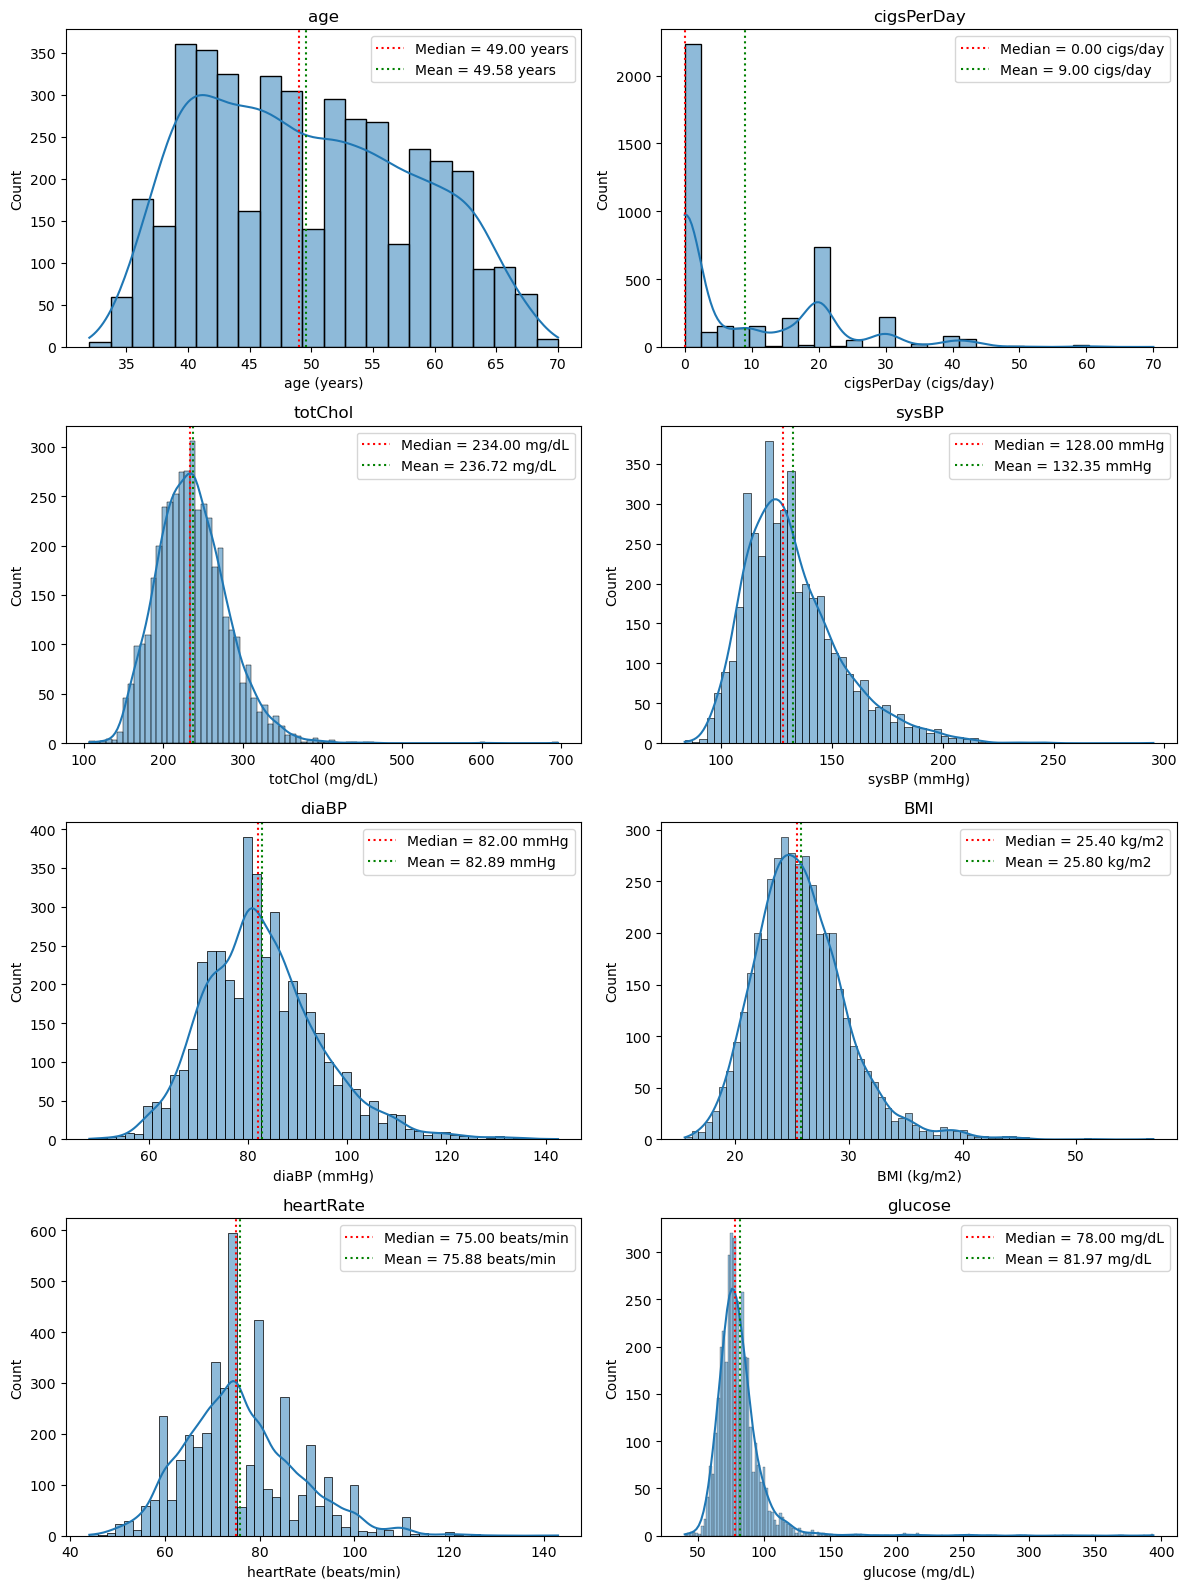

In [21]:
# List of units for these continuous variables
unit_list = ['years', 'cigs/day', 'mg/dL', 'mmHg', 'mmHg', 'kg/m2', 'beats/min', 'mg/dL']

# Calling a function from the functions library that will plot distributions in a grid
plot_grid_displots(df, continuous_cols, unit_list)

Most of the distributions are skewed, due to outliers, patients with extremely high values of certain features, that we need to address.
For example, values like total cholesterol concentration, glucose concentration, or blood pressure have extremely high values for some of the patients that may indicate severe medical conditions and emergencies.
There are very few patients who take anti-hypertension medications, while mean of the systolic blood pressure among all observed patients is 132 mmHg, which is higher than reference values for normal blood pressure. We may be dealing with "poorly medically managed" population, which may need to be reflected in the final report.
But these values are NOT unrealistic. 

## Dealing with missing values in continuous variables. 

In [22]:
# First of all, let's create a data set with all missing values just dropped.
df_drop = df.dropna()
df_drop.isna().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [23]:
print(f'Number of columns dropped: {df.shape[0] - df_drop.shape[0]}')

Number of columns dropped: 582


Let's double-check distributions of resulting data

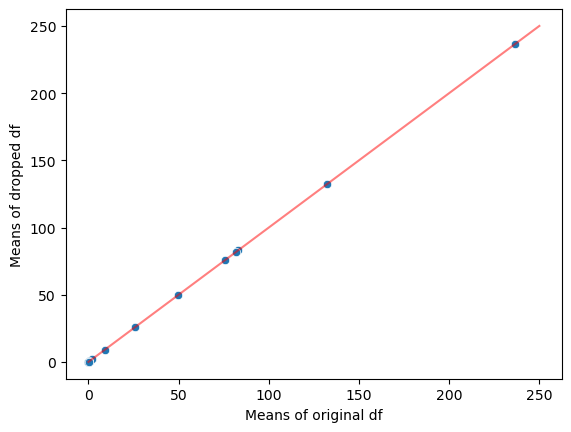

In [24]:
sns.scatterplot(x=df.mean(), y=df_drop.mean())
sns.lineplot(x=(0, 250), y=(0,250), color='r', alpha=0.5)
plt.xlabel('Means of original df')
plt.ylabel('Means of dropped df');

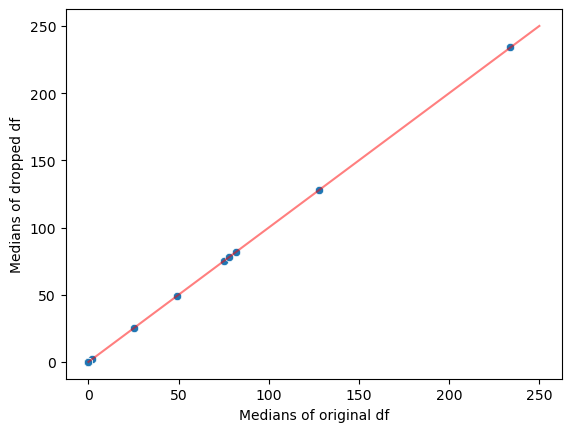

In [25]:
sns.scatterplot(x=df.median(), y=df_drop.median())
sns.lineplot(x=(0, 250), y=(0,250), color='r', alpha=0.5)
plt.xlabel('Medians of original df')
plt.ylabel('Medians of dropped df');

Ok, the means and medians are on the same places.

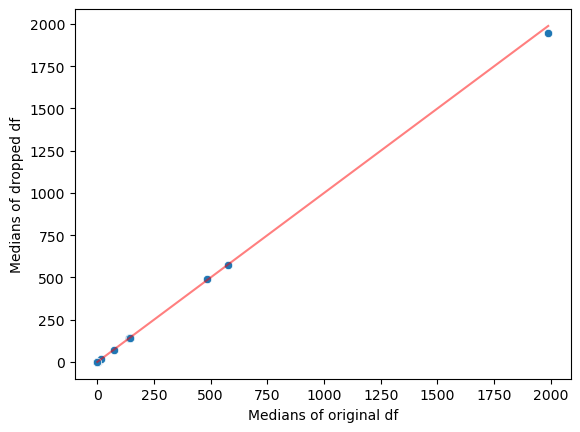

In [26]:
sns.scatterplot(x=df.var(), y=df_drop.var())
sns.lineplot(x=(0, df.var().max()), y=(0,df.var().max()), color='r', alpha=0.5)
plt.xlabel('Medians of original df')
plt.ylabel('Medians of dropped df');

Variances also look good.

In [27]:
# Function to compare mean or median values of datasets based on kind of values
def compare_mean_median(df1, df2, column):
    
    # Calculate means and medians
    mean1 = df1[column].mean()
    mean2 = df2[column].mean()
    median1 = df1[column].median()
    median2 = df2[column].median()

    # Print results
    print(f'{column}:\n'
      f'Mean difference = {mean1 - mean2}\n'
      f'Median difference = {median1 - median2}\n')

In [28]:
# Checking means and medians of continuous variables
for col in continuous_cols[:5]:
    compare_mean_median(df, df_drop, col)

age:
Mean difference = 0.027505904172208773
Median difference = 0.0

cigsPerDay:
Mean difference = -0.019066741425714184
Median difference = 0.0

totChol:
Mean difference = -0.15149985683802925
Median difference = 0.0

sysBP:
Mean difference = -0.015618368455449172
Median difference = 0.0

diaBP:
Mean difference = -0.01859846517339747
Median difference = 0.0



In [29]:
# Checking means and medians of continuous variables
for col in continuous_cols[5:]:
    compare_mean_median(df, df_drop, col)

BMI:
Mean difference = 0.01782268320399183
Median difference = 0.019999999999999574

heartRate:
Mean difference = 0.1483438981071714
Median difference = 0.0

glucose:
Mean difference = 0.11062633209240857
Median difference = 0.0



In [30]:
# Function to compare categorical bivariate features
def compare_cat(df1, df2, col):
    if col == 'education':
        pass
    else:
        percentage1 = df1[col].value_counts().iloc[0] / df1[col].value_counts().sum()
        percentage2 = df2[col].value_counts().iloc[0] / df2[col].value_counts().sum()
        print(f'{col}: Difference = {(percentage1 - percentage2).round(3)}%')

In [31]:
# Calling function over all categorical columns
for col in categorical_cols:
    compare_cat(df, df_drop, col)

male: Difference = 0.014%
currentSmoker: Difference = -0.005%
BPMeds: Difference = 0.001%
prevalentStroke: Difference = -0.0%
prevalentHyp: Difference = 0.001%
diabetes: Difference = 0.001%


Data barely changed with dropping missing values. We will keep this data set. However, let's try to impute them!

In [32]:
# Store original df as df_orig
df_orig = df.copy()

As shown on the distribution plots, means are higher than medians so all these variables. We can try to impute their missing values with median values. However we need to check some values, that are linked with continuous (e.g. `cigsPerDay` and `currentSmoker`)

In [33]:
# Count number of missing in cigsPerDay and currentSmoker
print(f"cigsPerDay:\t{df['cigsPerDay'].isna().sum()}\ncurrentSmoker:\t{df['currentSmoker'].isna().sum()}")

cigsPerDay:	29
currentSmoker:	0


It seens like there are no missing values in the `currentSmoker` column. We may impute missing cigsPerDay from it. If the patient is not a smoker, the number of cigarets should be 0, else we will impute them using distribution's median.

In [34]:
# Check all missing cigsPerDay values along with currentSmoker column
df[['cigsPerDay', 'currentSmoker']][df['cigsPerDay'].isna()]

,cigsPerDay,currentSmoker
131,NaN,1
139,NaN,1
1046,NaN,1
1292,NaN,1
1347,NaN,1
1451,NaN,1
1497,NaN,1
1610,NaN,1
1625,NaN,1
1870,NaN,1


It seems like the only missing values are for the patients who smoke. We will impute them with median.

In [35]:
df['cigsPerDay'] = df['cigsPerDay'].fillna(df['cigsPerDay'].median())
df['cigsPerDay'].isna().sum()

0

Let's check other missing values. 

In [36]:
# set threshold value
threshold_value = 140

# Custom styling function
def highlight_threshold_df(value):
    if value >= threshold_value:
        return 'background-color: red'
    else:
        return ''


# Check all missing BPMeds values along with blood pressure columns
df[['BPMeds', 'sysBP', 'diaBP']][df['BPMeds'].isna()].sort_values(['sysBP', 'diaBP'], ascending=False).style.applymap(highlight_threshold_df)

,BPMeds,sysBP,diaBP
2608,nan,208.000000,136.000000
2645,nan,205.000000,83.000000
797,nan,195.000000,118.000000
2367,nan,181.000000,112.500000
1861,nan,176.000000,84.000000
3526,nan,174.000000,110.000000
1002,nan,167.000000,105.000000
395,nan,165.000000,98.000000
1983,nan,164.000000,86.000000
1104,nan,162.000000,108.000000


Check how many patients have systolic blood pressure above the hypertension threshold of SysBP > 140 mmHg to estimate how many patients of this subset may have been taken BP medicine.

In [37]:
# Subset missing BPMeds patients that have elevated systolic blood pressure
df[['BPMeds', 'sysBP', 'diaBP']][df['BPMeds'].isna()].query('sysBP > 140').count()

BPMeds     0
sysBP     20
diaBP     20
dtype: int64

Estimated that there are only 20 such patients. So we can safely impute all missing BPMeds with 0.

In [38]:
# Impute missing BPMeds
df['BPMeds'] = df['BPMeds'].fillna(0)
df['BPMeds'].isna().sum()

0

Check other columns

In [39]:
df.isna().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay           0
BPMeds               0
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

Total cholesterol, glucose, heartrate, BMI and education can be imputed with median.

In [40]:
# Imputation
df['totChol'] = df['totChol'].fillna(df['totChol'].median())
df['glucose']  =df['glucose'].fillna(df['heartRate'].median())
df['heartRate'] = df['heartRate'].fillna(df['heartRate'].median())
df['BMI'] = df['BMI'].fillna(df['BMI'].median())
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay           0
BPMeds               0
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol              0
sysBP                0
diaBP                0
BMI                  0
heartRate            0
glucose              0
TenYearCHD           0
dtype: int64

The only column with missing values left is education. Let's see if there is any pattern in its distribution.

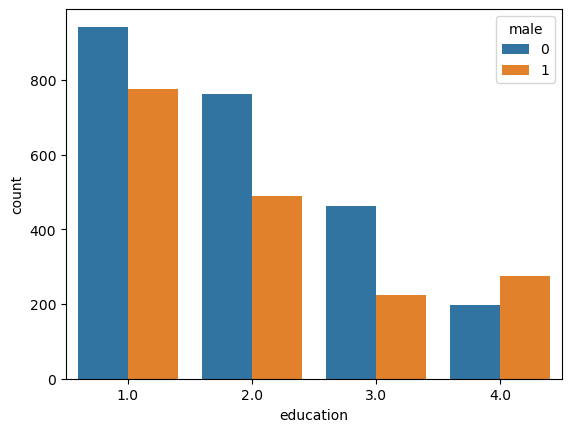

In [41]:
# Education vs gender
sns.countplot(data=df, x='education', hue='male');

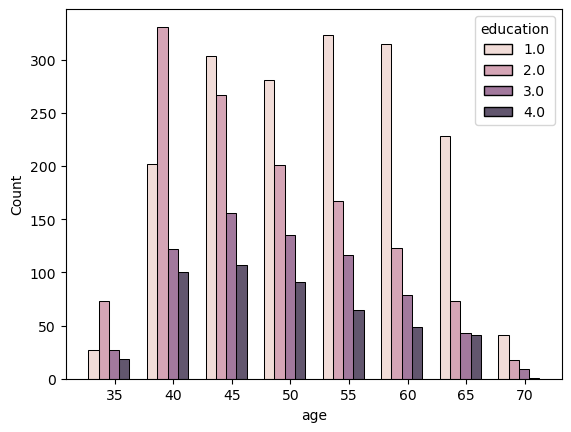

In [42]:
# Education vs age
sns.histplot(data=df, x='age', binwidth=5, hue='education', multiple='dodge', shrink=0.7);

Let's impute missing education values based on the median of gender/age group.

In [43]:
# # Imputation
bins = [0, 35, 40, 45, 50, 55, 60, 65, 100]
labels = [f'bin_{i}' for i in range(len(bins) - 1)]
df['age_bins'] = pd.cut(df['age'], bins=bins, labels=labels)

# Fill missing education values with the median for each sex and age bin
df['education'] = df.groupby(['male', 'age_bins'])['education'].transform(lambda x: x.fillna(x.median()))

# Drop temporary age bins column
df.drop(columns='age_bins', inplace=True)


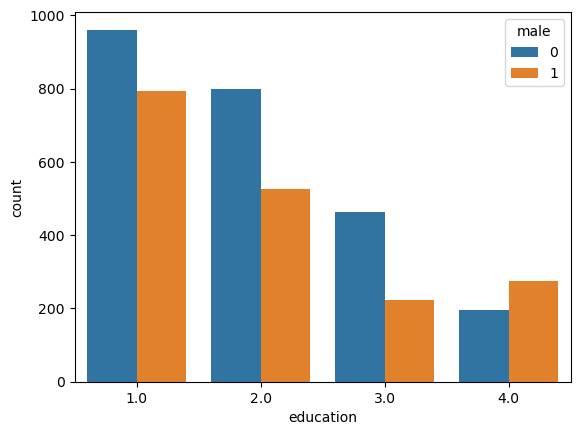

In [44]:
# Education vs gender
sns.countplot(data=df, x='education', hue='male');

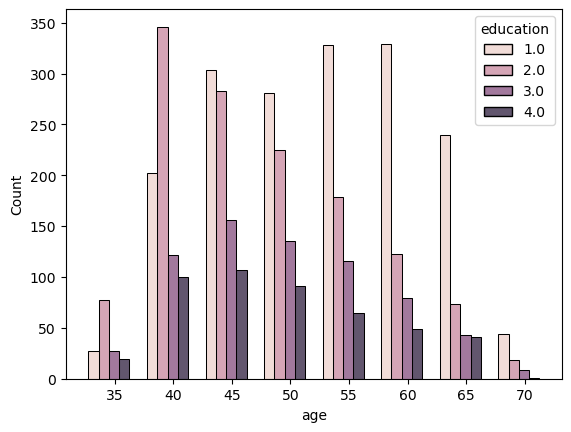

In [45]:
# Education vs age
sns.histplot(data=df, x='age', binwidth=5, hue='education', multiple='dodge', shrink=0.7);

In [46]:
df.isna().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

Compare rhe imputed data frame with the original

In [47]:
# Check the means and medians of continuous variables
for col in continuous_cols[5:]:
    compare_mean_median(df_orig, df, col)

BMI:
Mean difference = 0.0018022992236872426
Median difference = 0.0

heartRate:
Mean difference = 0.00020739116725110307
Median difference = 0.0

glucose:
Mean difference = 0.6378245067815556
Median difference = 1.0



In [48]:
# Check the means and medians of continuous variables
for col in continuous_cols[:5]:
    compare_mean_median(df_orig, df, col)

age:
Mean difference = 0.0
Median difference = 0.0

cigsPerDay:
Mean difference = 0.0616067885722309
Median difference = 0.0

totChol:
Mean difference = 0.032109314326675076
Median difference = 0.0

sysBP:
Mean difference = 0.0
Median difference = 0.0

diaBP:
Mean difference = 0.0
Median difference = 0.0



In [49]:
# Check the categorical columns
for col in categorical_cols:
    compare_cat(df_orig, df, col)

male: Difference = 0.0%
currentSmoker: Difference = 0.0%
BPMeds: Difference = -0.0%
prevalentStroke: Difference = 0.0%
prevalentHyp: Difference = 0.0%
diabetes: Difference = 0.0%


The imputed dataframe has similar statistics to the original dataframe.

## Target value TenYearCHD

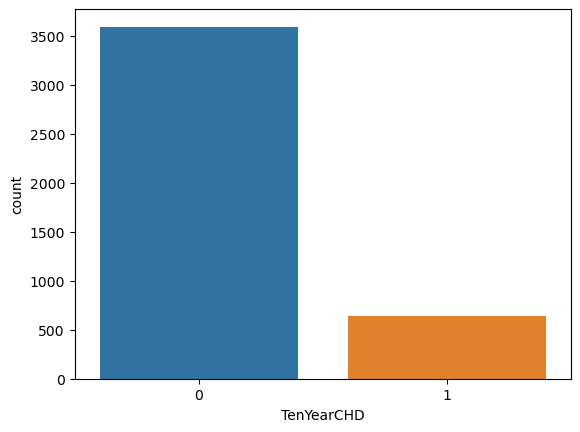

In [50]:
sns.countplot(data=df, x='TenYearCHD');

There is a high imbalance in the target value with almost 6x more patients without 10-year risk of CHD.
One approach to balance it could be dropping rows. But in this case we'll be left with too few entries.
We will balance it using different techniques at the EDA stage.

In [51]:
df_orig['TenYearCHD'].value_counts()[1] / df_orig['TenYearCHD'].value_counts()[0] 

0.1791875347801892

In [52]:
df_drop['TenYearCHD'].value_counts()[1] / df_drop['TenYearCHD'].value_counts()[0] 

0.1797353985156502

In [62]:
# Convert the rest of appropriate categorical columns to integers.
cols_to_int = ['education', 'cigsPerDay', 'BPMeds']
for d in [df, df_drop]:
    for col in cols_to_int:
        d[col] = d[col].astype(int)

/var/folders/rg/4zbmxsb52b3_t75jmnsfr4vm0000gn/T/ipykernel_15641/626414068.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d[col] = d[col].astype(int)


In [65]:
df.dtypes

male                 int64
age                  int64
education            int64
currentSmoker        int64
cigsPerDay           int64
BPMeds               int64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

In [66]:
# Saving resulting dataframes to the 'processed' folder
interim_data_path = '../data/interim/'

# Data dropped
save_file(df_drop, 'data_droped.csv', interim_data_path)

# Data imputed
save_file(df, 'data_imputed.csv', interim_data_path)

A file already exists with this name.

Writing file.  "../data/interim/data_droped.csv"
A file already exists with this name.

Writing file.  "../data/interim/data_imputed.csv"


# Summary of data wrangling
Two approaches were taken to clean the data: dropping missing values and imputing them.

Resulting tables `df_drop` and `df` were saved in `../data/interim` folder as `data_dropped.csv` and `data_imputed.csv`

